# Regression and Classification

Here, we show examples of how to use the Decompose library to calculate bias, variance and diversity on simple classification and regression tasks.

In [1]:
%matplotlib inline
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor

from decompose.experiments import BVDExperiment
from decompose import plotting_utils

import matplotlib.pyplot as plt
from decompose.data_utils import load_standard_dataset

n_trials = 50

train_data, train_labels, test_data, test_labels = load_standard_dataset("california", frac_training=0.5,
                                                                          normalize_data=True)

### Example 1: Regression Varying Tree Depth

In this example, we show how to run an experiment where we measure bias, variance and diversity in a Random Forest, varying the maximum allowed tree depth.

We plot the results of this experiment, showing the bias-variance-diversity decomposition, the bias-variance decomposition and the train/test errors.

In [2]:

rf_regressor = RandomForestRegressor(n_estimators=5)


experiment = BVDExperiment(rf_regressor, loss="squared", parameter_name="max_depth",
                          parameter_values=range(1,10,1))


results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)


100%|██████████| 9/9 [00:54<00:00,  6.07s/it]


First, we plot the terms of the bias-variance-diversity decomposition:

<AxesSubplot:xlabel='max depth'>

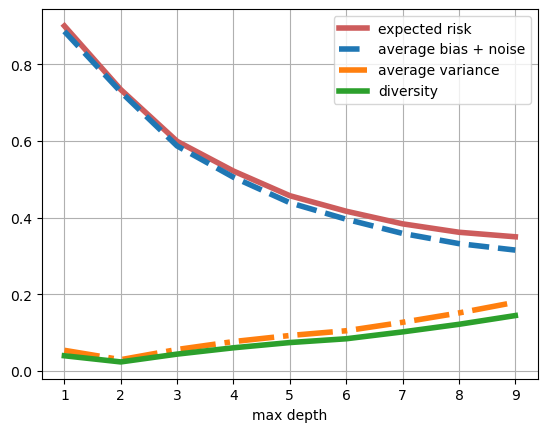

In [3]:

# Plot the average bias, average variance and diversity
plotting_utils.plot_bvd(results, x_label="max depth", integer_x=True)

If we prefer, we can plot the expected risk on a separate axis by using two calls to `plot_bvd`:


<AxesSubplot:xlabel='max_depth'>

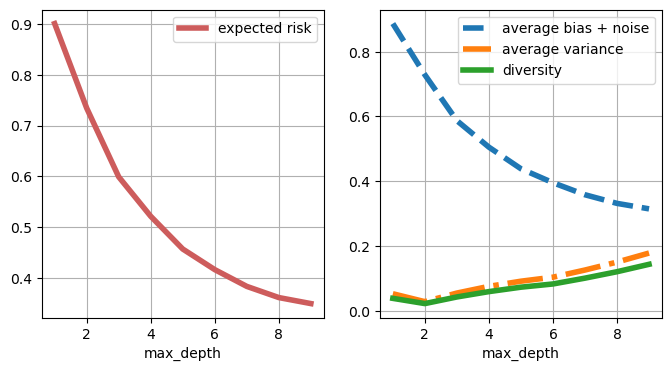

In [4]:
# Define subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
plotting_utils.plot_bvd(results, bias=False, variance=False, diversity=False, axes=axes[0])
plotting_utils.plot_bvd(results, ensemble_risk=False, axes=axes[1])

Finally, we plot the bias-variance decomposition terms for the ensemble and the train/test errors

<AxesSubplot:xlabel='max depth'>

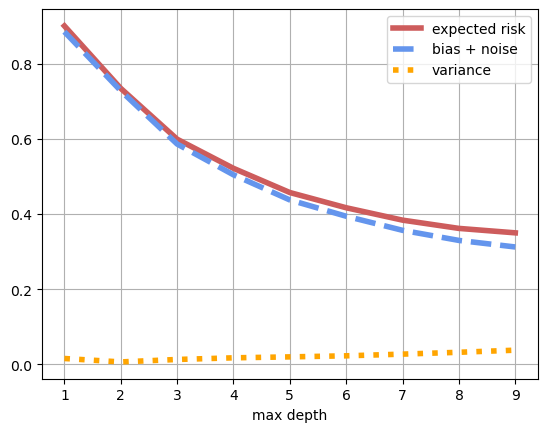

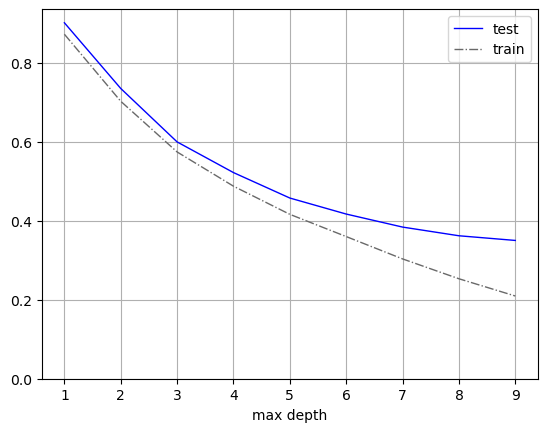

In [5]:
# Plot the ensemble bias and ensemble variance
plotting_utils.plot_bv(results, x_label="max depth", integer_x=True)
plotting_utils.plot_errors(results, x_label="max depth", integer_x=True)

### Example 2: Regression Varying Number of Ensemble Members

We now consider the same experimental setup, but this time vary the number of estimators in the ensemble.

Note that in `RandomForestRegressor` we set `warm_start=True`. This allows ensembles to be build incrementally. For instance, if out parameter values list contains 9 and 10, when constructing the ensemble of size 10, the existing ensembles of size 9 are used, with a single extra member being added. If `warm_start=False`, then all 10 ensemble members would be trained from scratch.

100%|██████████| 10/10 [01:16<00:00,  7.69s/it]


<AxesSubplot:xlabel='n estimators'>

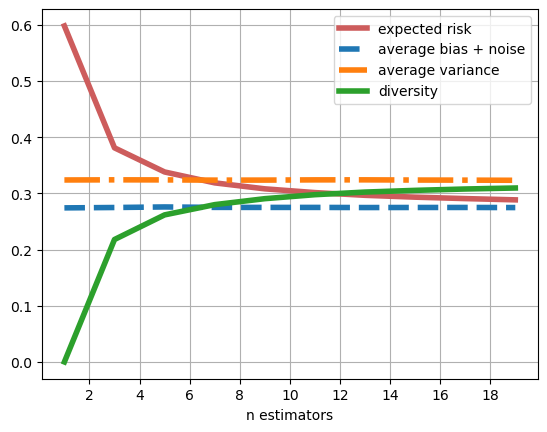

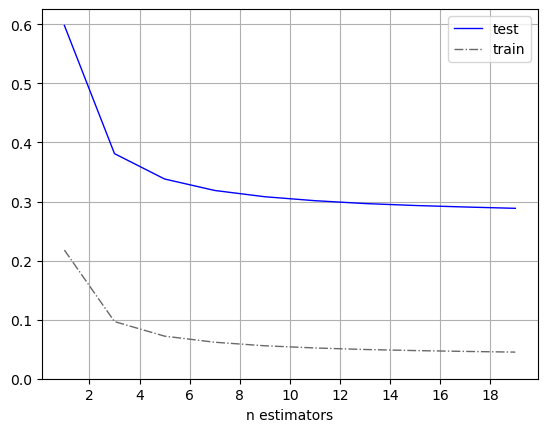

In [6]:
rf_regressor = RandomForestRegressor(n_estimators=5,
                                     warm_start=True)


experiment = BVDExperiment(rf_regressor,
                           loss="squared",
                           parameter_name="n_estimators",
                           parameter_values=range(1,20,2))

experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)
plotting_utils.plot_bvd(experiment, x_label="n estimators", integer_x=True)
plotting_utils.plot_errors(experiment, x_label="n estimators", integer_x=True)

### Example 3: Comparing Two Ensembles

In this example, we compare two Random Forest regressor one where the trees are limited to depth 2, the other where
the trees are allowed to be deeper, with a maximum depth of 5.


In [7]:
shallow_regressor = RandomForestRegressor(max_depth=2, warm_start=True)

shallow_experiment = BVDExperiment(shallow_regressor,
                                   loss="squared",
                                   parameter_name="n_estimators",
                                   parameter_values=range(1, 21, 1))

shallow_experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)

deep_regressor = RandomForestRegressor(max_depth=5, warm_start=True)

deep_experiment = BVDExperiment(deep_regressor,
                                loss="squared",
                                parameter_name="n_estimators",
                                parameter_values=range(1, 21, 1))

deep_experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)

100%|██████████| 20/20 [00:40<00:00,  2.04s/it]


<AxesSubplot:title={'center':'Deep Trees'}, xlabel='n_estimators'>

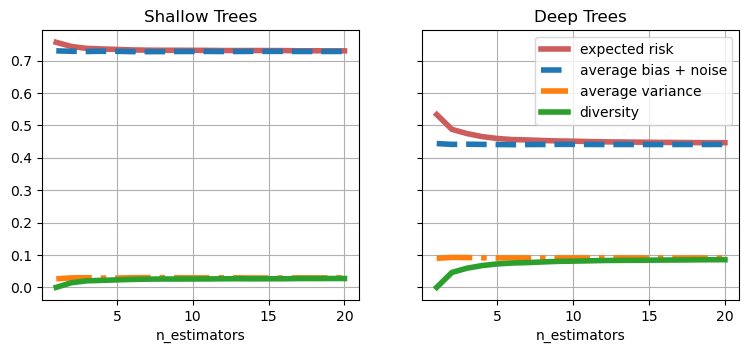

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(9)
fig.set_figheight(3.5)

plotting_utils.plot_bvd(shallow_experiment, axes=axs[0],
                        title="Shallow Trees", show_legend=False)
plotting_utils.plot_bvd(deep_experiment, axes=axs[1],
                        title="Deep Trees")


### Example 4: Classification varying tree depth

In this example, we look at the effects of varying depth on a classification ensemble using a Random Forest classifier and the cross-entropy loss.

100%|██████████| 17/17 [00:46<00:00,  2.76s/it]


<AxesSubplot:xlabel='max depth'>

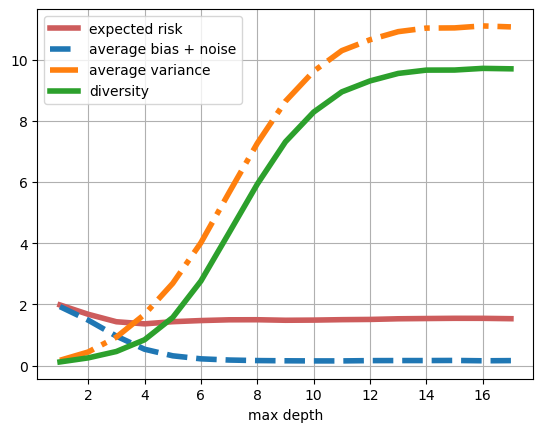

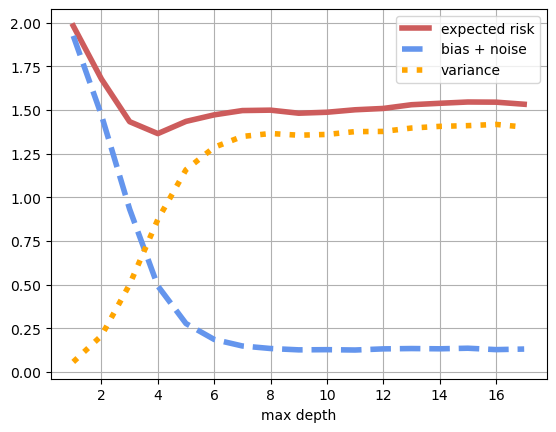

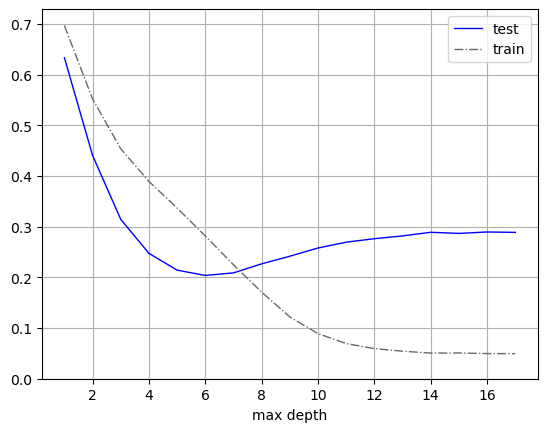

In [10]:
n_trials = 100
train_data, train_labels, test_data, test_labels = load_standard_dataset("digits", frac_training=0.5, label_noise=0.3)

rf_classifier = RandomForestClassifier(n_estimators=5)


experiment = BVDExperiment(rf_classifier,
                           loss="cross_entropy",
                           parameter_name="max_depth",
                           parameter_values=range(1,18,1))


results = experiment.run_experiment(train_data, train_labels, test_data, test_labels, n_trials=n_trials)

# Plot bias-variance-diversity decomposition
plotting_utils.plot_bvd(results, x_label="max depth", integer_x=True)
# Plot bias-variance decomposition
plotting_utils.plot_bv(results, x_label="max depth", integer_x=True)
# Plot training and test errors
plotting_utils.plot_errors(results, x_label="max depth", integer_x=True)

Note that in the previous cell, the training and test error are using the predict method of the RandomForestClassifier, so are the performance when combining the model with the arithmetic mean, _not the normalised geometric mean used for the bias-variance-diversity decomposition.